In [1]:
from torchvision import datasets, transforms
import os
import re
from PIL import Image
from os import listdir
from os.path import isfile, join
import json
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn.functional as F 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder




path_to_images = "C:\\Users\\-\\Downloads\\Учёба\\Репетитор\\Антон\\neural-network-runes-tutorial-master\\runes"

# Get all individual image paths from folder
paths_to_images = [f for f in listdir(path_to_images) if
                   isfile(join(path_to_images, f)) and re.match(".*\.png", f)]

In [2]:
paths_to_images

['drawn_ᚠ (1).png',
 'drawn_ᚠ.png',
 'drawn_ᚡ (1).png',
 'drawn_ᚡ.png',
 'drawn_ᚢ (1).png',
 'drawn_ᚢ.png',
 'drawn_ᚣ (1).png',
 'drawn_ᚣ.png',
 'drawn_ᚤ (1).png',
 'drawn_ᚤ.png',
 'drawn_ᚥ (1).png',
 'drawn_ᚥ.png',
 'drawn_ᚦ (1).png',
 'drawn_ᚦ.png',
 'drawn_ᚧ (1).png',
 'drawn_ᚧ.png',
 'drawn_ᚨ (1).png',
 'drawn_ᚨ.png',
 'drawn_ᚩ (1).png',
 'drawn_ᚩ.png',
 'drawn_ᚪ (1).png',
 'drawn_ᚪ.png',
 'drawn_ᚫ (1).png',
 'drawn_ᚫ.png',
 'drawn_ᚬ (1).png',
 'drawn_ᚬ.png',
 'drawn_ᚭ (1).png',
 'drawn_ᚭ.png',
 'drawn_ᚮ (1).png',
 'drawn_ᚮ.png',
 'drawn_ᚯ (1).png',
 'drawn_ᚯ.png',
 'drawn_ᚰ (1).png',
 'drawn_ᚰ.png',
 'drawn_ᚱ (1).png',
 'drawn_ᚱ.png',
 'drawn_ᚲ (1).png',
 'drawn_ᚲ.png',
 'drawn_ᚳ (1).png',
 'drawn_ᚳ.png',
 'drawn_ᚴ (1).png',
 'drawn_ᚴ.png',
 'drawn_ᚵ (1).png',
 'drawn_ᚵ.png',
 'drawn_ᚶ (1).png',
 'drawn_ᚶ.png',
 'drawn_ᚷ (1).png',
 'drawn_ᚷ.png',
 'drawn_ᚸ (1).png',
 'drawn_ᚸ.png',
 'drawn_ᚹ (1).png',
 'drawn_ᚹ.png',
 'drawn_ᚺ (1).png',
 'drawn_ᚺ.png',
 'drawn_ᚻ (1).png',
 'drawn_

In [3]:
folder_dir = "C:\\Users\\-\\Downloads\\Учёба\\Репетитор\\Антон\\neural-network-runes-tutorial-master\\runes"
train_whole = []
size = (32, 32)
for images in os.listdir(folder_dir):
    sample = Image.open(folder_dir + '\\' + images)
    sample = sample.resize(size)
    trans=transforms.Compose([transforms.ToTensor()])
    a=trans(sample)
    a = torch.flatten(a)
    train_whole.append(a)

In [4]:
X = tuple(train_whole)
X = torch.stack(train_whole)
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [5]:
example_file_pattern = r".*_([^(\s]+)(?: ?\([0-9]+\))?\.png$"
labels = [re.search(example_file_pattern, s).group(1) for s in paths_to_images]
if len(labels) != len(paths_to_images):
    raise ValueError("Expected number of labels to be equal to the number of example images!")

labels_clear_text = np.unique(np.asarray(labels))
indexed_classes = labels_clear_text.tolist()
print('...', len(labels_clear_text), 'classes found')

... 90 classes found


In [6]:
len(labels)

2014

# Дерево решений

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42)

dt = DecisionTreeClassifier(max_depth=10, random_state=42)

dt.fit(X_train, y_train)

#
X_test = np.array(X_test).reshape(len(X_test), -1)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

Accuracy: 0.5792079207920792, Precision: 0.49930258560447244, Recall: 0.49900000000000005, F1-Score: 0.4660027341079973


C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-ближайших

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# Оценка производительности модели на тестовой выборке
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

Accuracy: 0.7029702970297029, Precision: 0.7010513296227582, Recall: 0.6805194805194806, F1-Score: 0.6681522301652172


C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Наивный Байес

In [9]:
nb = GaussianNB()

# Обучение модели на обучающей выборке
nb.fit(X_train, y_train)

# Оценка производительности модели на тестовой выборке
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

Accuracy: 0.5742574257425742, Precision: 0.5117645013214633, Recall: 0.4992616033755274, F1-Score: 0.47451292692798347


C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NN

In [10]:
le = LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)
labels_encoded

array([ 1,  1,  2, ..., 76, 76, 78])

Epoch 1/15 - Training loss: 4.251, Test loss: 3.612, Accuracy: 0.158
Epoch 2/15 - Training loss: 3.059, Test loss: 2.387, Accuracy: 0.436
Epoch 3/15 - Training loss: 2.033, Test loss: 1.597, Accuracy: 0.592
Epoch 4/15 - Training loss: 1.405, Test loss: 1.094, Accuracy: 0.720
Epoch 5/15 - Training loss: 1.098, Test loss: 0.880, Accuracy: 0.785
Epoch 6/15 - Training loss: 0.845, Test loss: 0.659, Accuracy: 0.831
Epoch 7/15 - Training loss: 0.658, Test loss: 0.555, Accuracy: 0.830
Epoch 8/15 - Training loss: 0.560, Test loss: 0.435, Accuracy: 0.876
Epoch 9/15 - Training loss: 0.484, Test loss: 0.421, Accuracy: 0.865
Epoch 10/15 - Training loss: 0.455, Test loss: 0.361, Accuracy: 0.898
Epoch 11/15 - Training loss: 0.350, Test loss: 0.293, Accuracy: 0.917
Epoch 12/15 - Training loss: 0.311, Test loss: 0.262, Accuracy: 0.919
Epoch 13/15 - Training loss: 0.264, Test loss: 0.178, Accuracy: 0.947
Epoch 14/15 - Training loss: 0.234, Test loss: 0.206, Accuracy: 0.931
Epoch 15/15 - Training loss: 

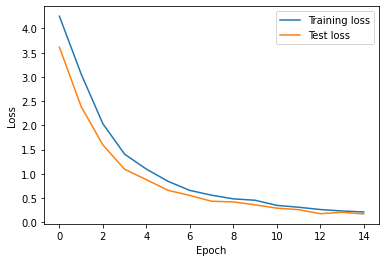

In [11]:
dataset = TensorDataset(X, torch.tensor(labels_encoded))


train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


test_loader = DataLoader(dataset, batch_size=32, shuffle=False)


#______________________________________________

class CNN1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(4096, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 90)
            )
        
    def forward(self, x):
        return self.layers(x)

#______________________________________________


model = CNN1()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 15

train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    
    # Train
    running_loss = 0.0
    model.train()
    
    for inputs, labels in train_loader:
        
        labels = labels.long()
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Test
    running_loss = 0.0
    running_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.long()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            predictions = torch.argmax(outputs, dim=1)
            accuracy = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
            running_loss += loss.item()
            running_accuracy += accuracy
            

        test_loss = running_loss / len(test_loader)
        test_losses.append(test_loss)
        
        test_accuracy = running_accuracy / len(test_loader)
        test_accuracies.append(test_accuracy)
    
    print(f"Epoch {epoch+1}/{epochs} - Training loss: {train_loss:.3f}, Test loss: {test_loss:.3f}, Accuracy: {test_accuracy:.3f}")
    
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# CNN

Epoch 1/15 - Training loss: 4.288, Test loss: 3.919, Accuracy: 0.102
Epoch 2/15 - Training loss: 3.425, Test loss: 2.660, Accuracy: 0.367
Epoch 3/15 - Training loss: 2.226, Test loss: 1.797, Accuracy: 0.480
Epoch 4/15 - Training loss: 1.558, Test loss: 1.224, Accuracy: 0.666
Epoch 5/15 - Training loss: 1.162, Test loss: 0.928, Accuracy: 0.734
Epoch 6/15 - Training loss: 0.937, Test loss: 0.738, Accuracy: 0.784
Epoch 7/15 - Training loss: 0.749, Test loss: 0.643, Accuracy: 0.824
Epoch 8/15 - Training loss: 0.652, Test loss: 0.522, Accuracy: 0.833
Epoch 9/15 - Training loss: 0.546, Test loss: 0.464, Accuracy: 0.856
Epoch 10/15 - Training loss: 0.456, Test loss: 0.404, Accuracy: 0.878
Epoch 11/15 - Training loss: 0.420, Test loss: 0.371, Accuracy: 0.870
Epoch 12/15 - Training loss: 0.349, Test loss: 0.283, Accuracy: 0.912
Epoch 13/15 - Training loss: 0.332, Test loss: 0.271, Accuracy: 0.908
Epoch 14/15 - Training loss: 0.298, Test loss: 0.242, Accuracy: 0.914
Epoch 15/15 - Training loss: 

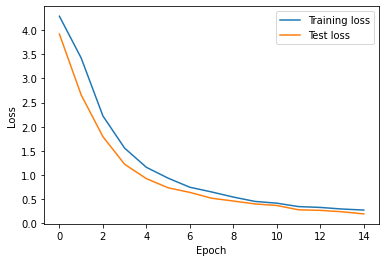

In [13]:
dataset = TensorDataset(X.view(-1, 1, 64, 64), torch.tensor(labels_encoded))

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

test_loader = DataLoader(dataset, batch_size=32, shuffle=False)

class CNN1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(32 * 14 * 14, 128),
            nn.ReLU(),
            nn.Linear(128, 90)
        )
        
    def forward(self, x):
        return self.layers(x)

#______________________________________________


model = CNN1()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 15

train_losses = []
test_losses = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []

for epoch in range(epochs):
    
    # Train
    running_loss = 0.0
    model.train()
    
    for inputs, labels in train_loader:
        labels = labels.long()

        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Test
    running_loss = 0.0
    running_accuracy = 0.0
    running_precision = 0.0
    running_recall = 0.0
    running_f1 = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.long()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            predictions = torch.argmax(outputs, dim=1)
            accuracy = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
            precision = precision_score(labels.cpu().numpy(), predictions.cpu().numpy(),average='macro', zero_division=1)
            recall = recall_score(labels.cpu().numpy(), predictions.cpu().numpy(),average='macro', zero_division=1) 
            f1 = f1_score(labels.cpu().numpy(), predictions.cpu().numpy(),average='macro', zero_division=1)
            running_loss += loss.item()
            running_accuracy += accuracy
            running_precision += precision
            running_recall += recall
            running_f1 += f1

        test_loss = running_loss / len(test_loader)
        test_losses.append(test_loss)
        
        test_accuracy = running_accuracy / len(test_loader)
        test_precision = running_precision / len(test_loader)
        test_recall = running_recall / len(test_loader)
        test_f1 = running_f1 / len(test_loader)

        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1s.append(test_f1)
    
    print(f"Epoch {epoch+1}/{epochs} - Training loss: {train_loss:.3f}, Test loss: {test_loss:.3f}, Accuracy: {test_accuracy:.3f}")
print(f'Total Accuracy:{test_accuracies[-1]}, Total Precision:{test_precisions[-1]}, Total Recall:{test_recalls[-1]}, Total F1:{test_f1s[-1]}')
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
